# 0. Run the backtest code

In [2]:
# Rb 5min test
# !python ../Main.py -o ../Results/Ru_15min_PriceThreshold_NoCost -c ../Config/Ru_15min_PriceThreshold_NoCost.json > /dev/null

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Ru - 15min 

In [2]:
Ru_15min_result = GetResult("../Results/Ru_15min_PriceThreshold_NoCost/")


Tester= 0 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ru_15min_PriceThreshold_NoCost/Result_11.pkl

Tester= 12 |file_path =  ../Results

## 1.0 Rb - 15min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [4]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[], 5:[], 10:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Ru_15min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# NO trading cost

## 1.1 Ru --- 15min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

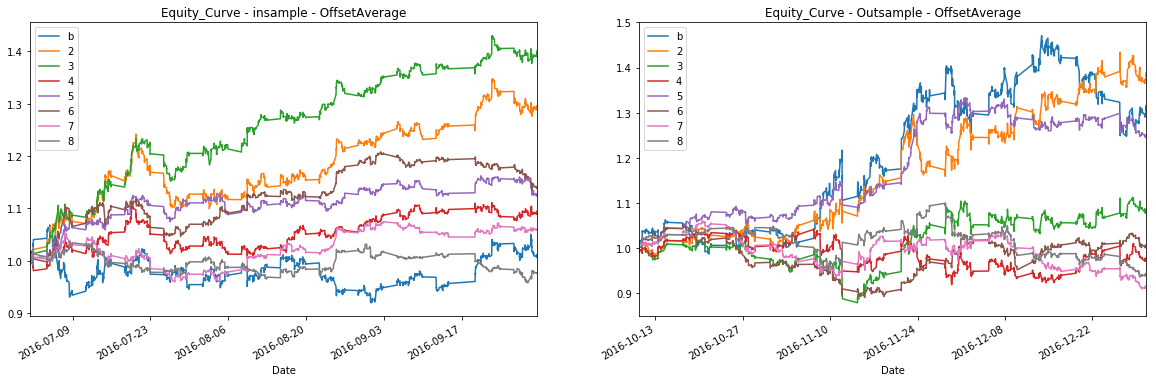

In [5]:
Ru_15min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Ru_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [6]:
Ru_15min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.270646,0.004168,-0.003227,0.005022,0.000445,-0.016039,0.038198,-0.124268,1.558037,3.881222,598.8,1.292873,0.433183
1,0.269439,0.005354,-0.003369,0.005252,0.000645,-0.018101,0.038406,-0.085484,1.557147,4.972637,570.2,1.396232,0.453168
2,0.286537,0.001470,-0.003873,0.004737,0.000152,-0.032989,0.029432,-0.132449,1.228130,1.275876,598.2,1.089466,0.457580
3,0.293567,0.001915,-0.003913,0.004744,0.000226,-0.031122,0.033933,-0.113639,1.219599,1.721310,564.8,1.129199,0.467957
4,0.294353,0.002087,-0.004274,0.004756,0.000252,-0.036812,0.030504,-0.111989,1.113106,1.750984,530.0,1.132972,0.488205
5,0.287133,0.000956,-0.004544,0.005139,0.000141,-0.034161,0.028361,-0.145527,1.138886,0.805496,442.0,1.070551,0.474951
6,0.264872,-0.000335,-0.005672,0.005816,-0.000077,-0.035872,0.030281,-0.154508,1.028244,-0.278982,312.0,0.971723,0.479611


In [7]:
Ru_15min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.377195,0.005708,-0.004472,0.007154,0.000578,-0.037089,0.077075,-0.110967,1.606909,3.808260,593.2,1.378159,0.427106
1,0.389514,0.001500,-0.005138,0.007393,0.000144,-0.050726,0.066571,-0.186275,1.439351,0.978796,540.4,1.090561,0.416674
2,0.438857,-0.000261,-0.005701,0.006280,-0.000028,-0.051607,0.049025,-0.205154,1.112418,-0.034636,586.4,0.978771,0.465155
3,0.413705,0.003814,-0.005966,0.006490,0.000452,-0.053520,0.045953,-0.163354,1.090880,2.310652,543.2,1.250749,0.505293
4,0.442312,0.000174,-0.006428,0.006921,0.000007,-0.041045,0.043922,-0.199700,1.083330,0.115622,486.6,0.998040,0.473427
5,0.418525,-0.001400,-0.007107,0.007087,-0.000212,-0.054098,0.054414,-0.213600,1.004564,-0.861109,411.2,0.903959,0.476987
6,0.422573,-0.000899,-0.007975,0.007805,-0.000166,-0.051212,0.058431,-0.221372,0.980526,-0.493386,316.4,0.928926,0.488313


## 2.2  Ru --- 15min offset average --- price threshold = 10

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

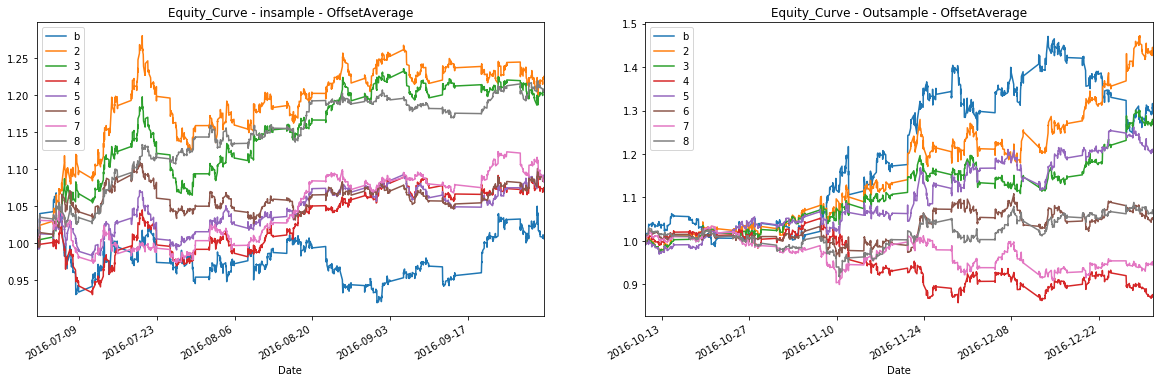

In [8]:
Ru_15min_Offset_Average_10d = OffSetAverage(NoCost_Result_Group[10])

Benchmark = Ru_15min_Offset_Average_10d.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_10d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [9]:
Ru_15min_Offset_Average_10d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.269552,0.003287,-0.003050,0.004621,0.000298,-0.016178,0.041702,-0.130307,1.518042,3.124906,705.0,1.224020,0.423226
1,0.287064,0.003036,-0.003232,0.004681,0.000331,-0.020924,0.040684,-0.126827,1.448733,2.696318,661.4,1.206521,0.436663
2,0.269769,0.001194,-0.003777,0.004518,0.000143,-0.034333,0.027168,-0.146352,1.207778,1.110050,583.6,1.076713,0.462501
3,0.281975,0.001426,-0.003498,0.004170,0.000131,-0.031540,0.029836,-0.135162,1.196194,1.293599,682.0,1.096779,0.459568
4,0.270795,0.001351,-0.003732,0.004127,0.000124,-0.030536,0.032123,-0.152297,1.110264,1.576351,677.6,1.097260,0.477393
5,0.271333,0.001313,-0.003659,0.004039,0.000116,-0.029208,0.026538,-0.135304,1.112082,1.278842,708.8,1.089955,0.474247
6,0.286463,0.002993,-0.003556,0.004250,0.000287,-0.028994,0.029159,-0.090769,1.196865,2.584831,669.2,1.208479,0.477646


In [10]:
Ru_15min_Offset_Average_10d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.367182,0.006377,-0.004205,0.006627,0.000591,-0.038108,0.064575,-0.105720,1.577855,4.298493,650.2,1.442086,0.435819
1,0.349655,0.004257,-0.004733,0.006933,0.000436,-0.042429,0.059883,-0.123680,1.477060,2.947145,603.4,1.273542,0.436051
2,0.384817,-0.001992,-0.005833,0.006348,-0.000234,-0.053576,0.041895,-0.257747,1.124186,-1.285182,556.2,0.908536,0.451901
3,0.398137,0.003390,-0.005128,0.006117,0.000312,-0.052207,0.055014,-0.130906,1.197249,2.143931,637.0,1.202122,0.475387
4,0.431539,0.001018,-0.005431,0.005961,0.000087,-0.048610,0.050748,-0.207801,1.108664,0.502089,632.8,1.065830,0.475531
5,0.444168,-0.000769,-0.005327,0.005807,-0.000073,-0.047050,0.044997,-0.233167,1.092365,-0.447688,660.0,0.949736,0.462736
6,0.415198,0.001288,-0.005437,0.005735,0.000124,-0.044605,0.044997,-0.213223,1.056639,0.874123,656.8,1.087012,0.487143


## 2.3  Ru --- 15min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

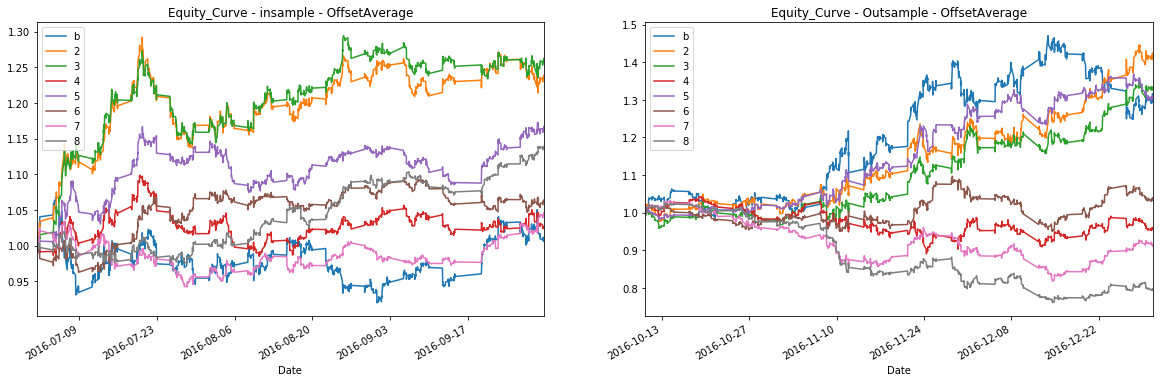

In [11]:
Ru_15min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Ru_15min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [12]:
Ru_15min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.291594,0.003467,-0.003102,0.004799,0.000330,-0.016032,0.045514,-0.134623,1.549385,3.032301,675.0,1.236294,0.421717
1,0.277318,0.003746,-0.003006,0.004160,0.000303,-0.017034,0.039797,-0.120595,1.393230,3.485861,792.6,1.260855,0.445479
2,0.284778,0.000478,-0.003601,0.004134,0.000042,-0.030650,0.029987,-0.154118,1.159302,0.359982,679.0,1.022797,0.458567
3,0.293484,0.002483,-0.003596,0.004261,0.000235,-0.030615,0.034476,-0.141203,1.185709,2.100480,684.8,1.163709,0.472946
4,0.276395,0.001024,-0.003745,0.004025,0.000097,-0.028668,0.030052,-0.120311,1.075015,0.898123,683.0,1.059431,0.479125
5,0.297430,0.000723,-0.003986,0.004312,0.000072,-0.030931,0.029053,-0.141021,1.085615,0.656565,639.0,1.038789,0.475393
6,0.274119,0.002045,-0.004515,0.004794,0.000258,-0.028427,0.029667,-0.143658,1.073397,2.000446,486.8,1.148985,0.502449


In [14]:
Ru_15min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.363392,0.006130,-0.004243,0.006721,0.000573,-0.038108,0.070281,-0.092219,1.587214,4.209523,642.8,1.413392,0.432437
1,0.381990,0.004952,-0.004287,0.005966,0.000412,-0.041941,0.059851,-0.105799,1.403057,3.252987,723.2,1.323760,0.448017
2,0.401990,-0.000495,-0.005419,0.006057,-0.000063,-0.048956,0.042881,-0.207835,1.131040,-0.245398,625.0,0.972613,0.456655
3,0.432216,0.004683,-0.005255,0.005991,0.000422,-0.050510,0.051212,-0.135110,1.142716,2.755778,659.6,1.305462,0.496356
4,0.404162,0.000780,-0.005601,0.005830,0.000061,-0.044042,0.052068,-0.230417,1.045416,0.631904,646.6,1.043279,0.483602
5,0.431523,-0.001449,-0.005713,0.005782,-0.000140,-0.052055,0.045759,-0.289052,1.015636,-1.007276,625.8,0.915942,0.472806
6,0.481825,-0.003666,-0.006769,0.006199,-0.000436,-0.049041,0.045356,-0.336941,0.918891,-1.967969,503.2,0.789521,0.479430


## 2.4  Ru --- 15min offset average --- price threshold = 5

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

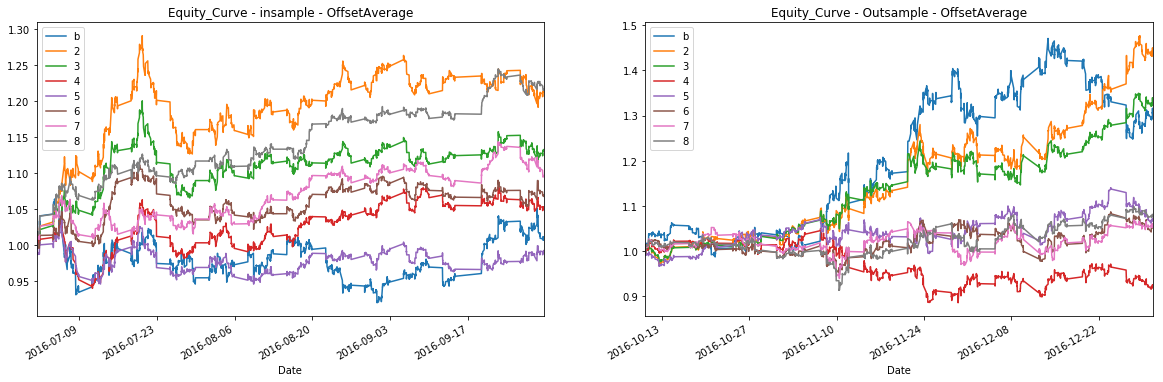

In [15]:
Ru_15min_Offset_Average_5d = OffSetAverage(NoCost_Result_Group[5])

Benchmark = Ru_15min_Offset_Average_5d.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_5d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [16]:
Ru_15min_Offset_Average_5d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.277466,0.003150,-0.003047,0.004598,0.000284,-0.016178,0.041702,-0.134557,1.512266,2.882610,709.4,1.212187,0.422292
1,0.291615,0.002009,-0.003363,0.004804,0.000238,-0.022292,0.037959,-0.157166,1.434509,1.795838,644.0,1.138084,0.428661
2,0.275493,0.000863,-0.003742,0.004568,0.000109,-0.034333,0.030746,-0.145942,1.225257,0.834031,581.6,1.050989,0.453520
3,0.273786,-0.000071,-0.003617,0.004119,0.000001,-0.035843,0.029556,-0.157935,1.140954,-0.154750,664.4,0.994716,0.453341
4,0.270551,0.001090,-0.003604,0.004163,0.000114,-0.030312,0.030567,-0.142474,1.157537,1.091142,681.2,1.066611,0.467247
5,0.278547,0.001492,-0.003510,0.004186,0.000131,-0.026711,0.026363,-0.135175,1.199746,1.462202,707.6,1.099455,0.458616
6,0.286445,0.003104,-0.003459,0.004175,0.000288,-0.025907,0.032292,-0.102325,1.210465,2.832609,704.8,1.225001,0.476539


In [17]:
Ru_15min_Offset_Average_5d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.370801,0.006428,-0.004199,0.006669,0.000594,-0.038108,0.069021,-0.097814,1.591183,4.349182,651.0,1.441812,0.434315
1,0.364318,0.005011,-0.004686,0.007048,0.000521,-0.042120,0.060108,-0.113044,1.503070,3.352238,595.2,1.327660,0.437724
2,0.378622,-0.001084,-0.005641,0.006488,-0.000135,-0.053576,0.048235,-0.220490,1.184729,-0.684279,554.4,0.951188,0.446186
3,0.393563,0.001355,-0.005367,0.005940,0.000115,-0.053719,0.050188,-0.153971,1.112595,0.835357,615.8,1.075172,0.477572
4,0.395461,0.001104,-0.005399,0.006071,0.000098,-0.048341,0.054436,-0.192856,1.132067,0.692037,635.2,1.049086,0.470056
5,0.437780,0.001028,-0.005084,0.005922,0.000093,-0.044029,0.047607,-0.196665,1.167794,0.542125,666.4,1.049800,0.462542
6,0.405135,0.001423,-0.005282,0.005777,0.000118,-0.045383,0.050501,-0.194584,1.096152,0.954184,670.2,1.078977,0.478520


## 2.5  Ru --- 15min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

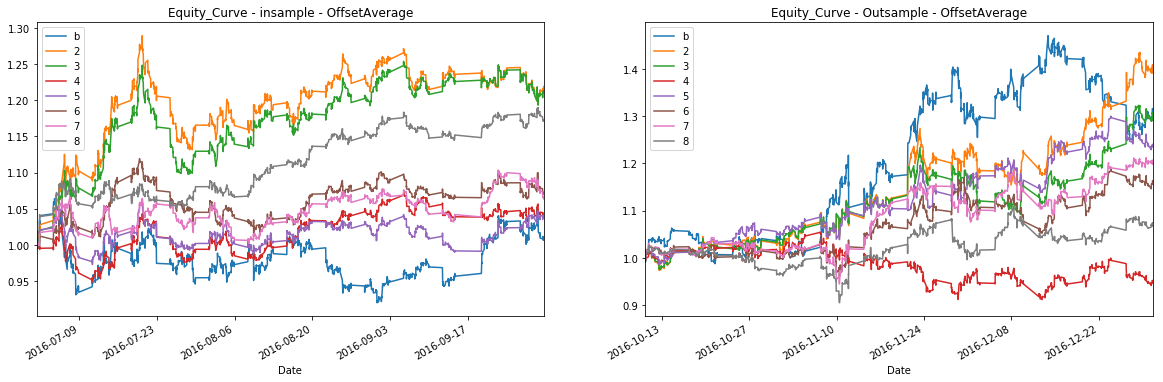

In [19]:
Ru_15min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0e-4])

Benchmark = Ru_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [20]:
Ru_15min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.279836,0.003203,-0.003031,0.004648,0.000290,-0.016178,0.041702,-0.130411,1.536602,2.907569,707.8,1.215948,0.418736
1,0.282524,0.003121,-0.003257,0.005048,0.000340,-0.017462,0.037959,-0.128077,1.551688,2.807318,636.8,1.209449,0.421455
2,0.270366,0.000718,-0.003656,0.004426,0.000116,-0.034333,0.026233,-0.148243,1.211288,0.756142,638.6,1.045596,0.455869
3,0.267900,0.000682,-0.003470,0.004186,0.000067,-0.035843,0.029836,-0.139681,1.209667,0.650764,680.4,1.037545,0.448834
4,0.259270,0.001133,-0.003603,0.004246,0.000117,-0.030312,0.030567,-0.140774,1.182036,1.191660,668.0,1.069551,0.463345
5,0.285632,0.001022,-0.003395,0.003997,0.000085,-0.028763,0.025522,-0.141856,1.186982,1.074506,764.4,1.080971,0.452321
6,0.274218,0.002534,-0.003366,0.004077,0.000222,-0.027784,0.027465,-0.143430,1.217829,2.288506,748.2,1.196156,0.464887


In [21]:
Ru_15min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.363228,0.005957,-0.004227,0.006582,0.000549,-0.038108,0.066901,-0.107774,1.560670,4.093185,652.8,1.403641,0.434955
1,0.334743,0.004656,-0.004559,0.007075,0.000505,-0.036470,0.060418,-0.130222,1.550600,3.477722,587.2,1.298099,0.428860
2,0.394370,-0.000647,-0.005583,0.006203,-0.000131,-0.057473,0.044003,-0.244129,1.142031,-0.503177,605.0,1.007577,0.457637
3,0.409279,0.003794,-0.005076,0.006193,0.000355,-0.053141,0.054488,-0.120632,1.223199,2.337598,627.6,1.232135,0.474843
4,0.420779,0.002701,-0.005341,0.006266,0.000249,-0.049998,0.055240,-0.181679,1.175892,1.565742,617.6,1.165653,0.474698
5,0.436843,0.003244,-0.004919,0.005689,0.000271,-0.043966,0.047900,-0.171870,1.162935,1.872162,707.2,1.197249,0.481365
6,0.411156,0.001243,-0.005228,0.005488,0.000109,-0.036638,0.055998,-0.171489,1.050611,0.770412,698.2,1.079625,0.488780
